In [ ]:
import os
import re
import requests
import zipfile,io
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
from typing import Callable
%matplotlib inline 

In [ ]:
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
data_dir = os.path.join(os.curdir, "data")
tweets_dir = os.path.join(data_dir, "arsentd-lev")

In [ ]:
link="http://oma-project.com/ArSenL/ArSenTD-LEV.zip"
response=requests.get(link)


In [ ]:

z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall(tweets_dir)
os.listdir(tweets_dir)

['ArSenTD-LEV.tsv', 'README.txt']

In [ ]:
raw_filepath=os.path.join(tweets_dir,'ArSenTD-LEV.tsv')
raw = pd.read_csv(filepath_or_buffer=raw_filepath, sep="\t", encoding="utf_8")

In [ ]:
raw.head()

Tweet    Country     Topic  \
0  "ุฃูุง ุฃุคูู ุจุฃู ุงูุงูุณุงู ููุทูุฆ ุฌูุงูู ุนูุฏ ุงุจุชุนุงุฏ ู...    lebanon  personal   
1  ูู ุงูุฐุงูุฑู... @3FInQe . ุนูุฏูุง ุงุนุชูุฏ ูุฑูุณุชูุงูู ...     jordan    sports   
2  ูุง ูุฎูู ูู ุถุบูุทุงุช ุงูุญูุงุฉ. ููุญู ูุนูุด ุนูู ุฃุฑุถ ุฃุน...  palestine  personal   
3  #ูุตุทูุญุงุช_ูุจูุงููู_ุญูุฑุช_ุงูุจุดุฑูู ุจุชูุตู ุนุงูุจูุช ุ ุจ...    lebanon  personal   
4  ูุตูุช !! ูุชุณูุฑ ุญูุงุชูุง ุนูู ูู ูุฑุงู ูุงููุงูุณ ูู ุชุน...  palestine  personal   

  Sentiment Sentiment_Expression     Sentiment_Target  
0  negative             implicit          ุจุฑูู ุงูุนููู  
1  positive             explicit  ุงูุถู ูุงุนุจ ูู ุงูุนุงูู  
2   neutral                 none                 none  
3  negative             explicit      ูุตุทูุญุงุช_ูุจูุงููู  
4  negative             explicit       ุณ ูู ุชุนุฏ ููุง ู

**Explority Data Analysis**

In [ ]:
data=raw.copy(deep=True)

In [ ]:
data['Sentiment'].value_counts()

negative         1253
neutral           885
positive          835
very_negative     630
very_positive     397
Name: Sentiment, dtype: int64

In [ ]:
data['Sentiment']=data['Sentiment'].replace(
    {'very_negative':'negative',
    'very_positive':'positive'}
)

In [ ]:
data['Sentiment'].value_counts()

negative    1883
positive    1232
neutral      885
Name: Sentiment, dtype: int64

In [ ]:
sentiment_count=data.groupby(by='Sentiment',as_index=False).count()[['Sentiment','Tweet']]

In [ ]:
sentiment_count

Sentiment  Tweet
0  negative   1883
1   neutral    885
2  positive   1232

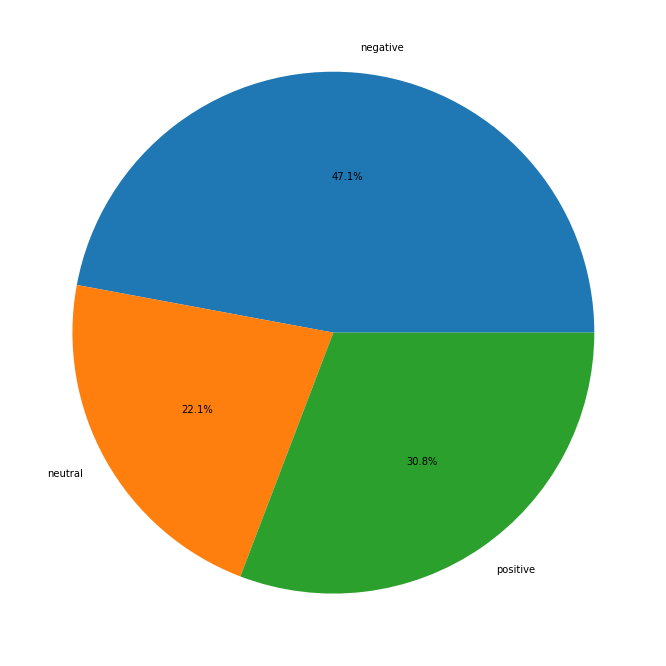

In [ ]:
fig,ax=plt.subplots(figsize=(15,12))
ax.pie(x=sentiment_count['Tweet'],labels=sentiment_count['Sentiment'], autopct='%1.1f%%');

Common EDA Pattern Text
to count the characters
to count the the words

In [ ]:
data['word_count']=data['Tweet'].apply(lambda x:len(x.split(' ')))

In [ ]:
data['word_count'].describe()

count    4000.00000
mean       22.69825
std         3.28495
min         7.00000
25%        21.00000
50%        23.00000
75%        25.00000
max        35.00000
Name: word_count, dtype: float64

In [ ]:
data['char_count']=data['Tweet'].apply(len)
data['char_count'].describe()

count    4000.000000
mean      131.364250
std        14.314636
min        42.000000
25%       128.000000
50%       138.000000
75%       140.000000
max       147.000000
Name: char_count, dtype: float64

**Vocabulary**

In [ ]:
all_words=[word for tweet in data['Tweet']for word in tweet.split(" ")]
vocab=Counter(all_words)
len(vocab)

26552

**Explore most and least Common words in vocab**

In [ ]:
print('Least_Common')
vocab.most_common()[-10:]


Least_Common


[('ุงูุฑูุญุฉ', 1),
 ('ูููุงู', 1),
 ('ูุจุงุดุฑุงู', 1),
 ('ูุดุฑุฉ', 1),
 ('ุงูุฑูุงุถูุฉ', 1),
 ('8:30', 1),
 ('"ุงูุนุฑุจ"', 1),
 ('ุญููุฏ', 1),
 ('๐', 1),
 ('https://t.co/oUstA9G7dM', 1)]

In [ ]:
print('Most_Common')
vocab.most_common(10)

Most_Common


[('ูู', 1906),
 ('ูู', 1610),
 ('.', 1105),
 ('ู', 963),
 ('ุนูู', 913),
 ('ุงููู', 787),
 ('ูุง', 769),
 ('ูุง', 656),
 ('ุ', 589),
 ('ูู', 493)]

In [ ]:
counts=list(vocab.values())

Text(0.5, 1.0, 'Word_Count')

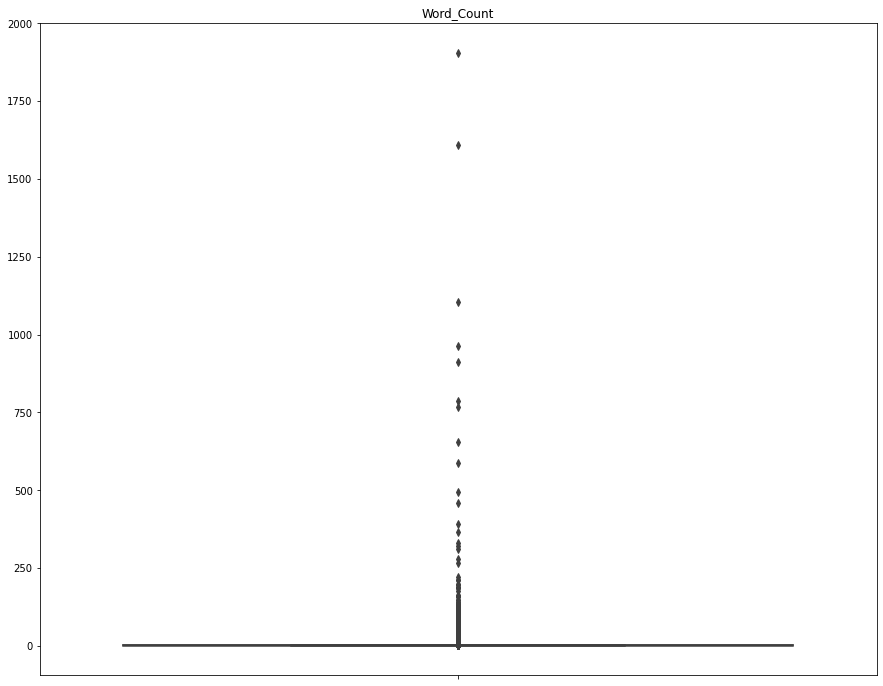

In [ ]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(y=counts,ax=ax)
ax.set_title("Word_Count")

In [ ]:
stop_words=stopwords.words("arabic")
all_words_pruned=[word for tweet in data['Tweet'] for word in tweet.split(" ")if word not in stop_words]


In [ ]:
pruned_vocab=Counter(all_words_pruned)
pruned_vocab

Counter({'"ุฃูุง': 3,
         'ุฃุคูู': 2,
         'ุจุฃู': 32,
         'ุงูุงูุณุงู': 13,
         'ููุทูุฆ': 2,
         'ุฌูุงูู': 2,
         'ุงุจุชุนุงุฏ': 2,
         'ูุญุจ': 6,
         'ุ': 589,
         'ุจุฑูู': 4,
         'ุงูุนููู': 4,
         'ูุฎุชูู': 2,
         'ููุตุจุญ': 2,
         'ุฐุงุจูุงู': 2,
         'ููุทูุฆูุงุ': 2,
         'ูุชุญูู': 2,
         'ุฑุจูุนู': 2,
         'ุงูู': 222,
         'ุฎุฑูู.".': 2,
         '@gbraniiat': 2,
         'ุงูุฐุงูุฑู...': 2,
         '@3FInQe': 2,
         '.': 1105,
         'ุนูุฏูุง': 99,
         'ุงุนุชูุฏ': 9,
         'ูุฑูุณุชูุงูู': 4,
         'ุงูู': 76,
         'ุงูุถู': 27,
         'ูุงุนุจ': 24,
         'ุงูุนุงูู': 74,
         'ูุงูุง': 2,
         'ููุณู': 8,
         'ุซุงูุซุงู': 2,
         'ุญุฏุซ': 13,
         'ุงูุนูุณ': 3,
         '๐๐๐๐๐๐': 2,
         'https://t.co/n3EZ0pX0X7': 2,
         'ูุฎู

In [ ]:
len(pruned_vocab)

26250

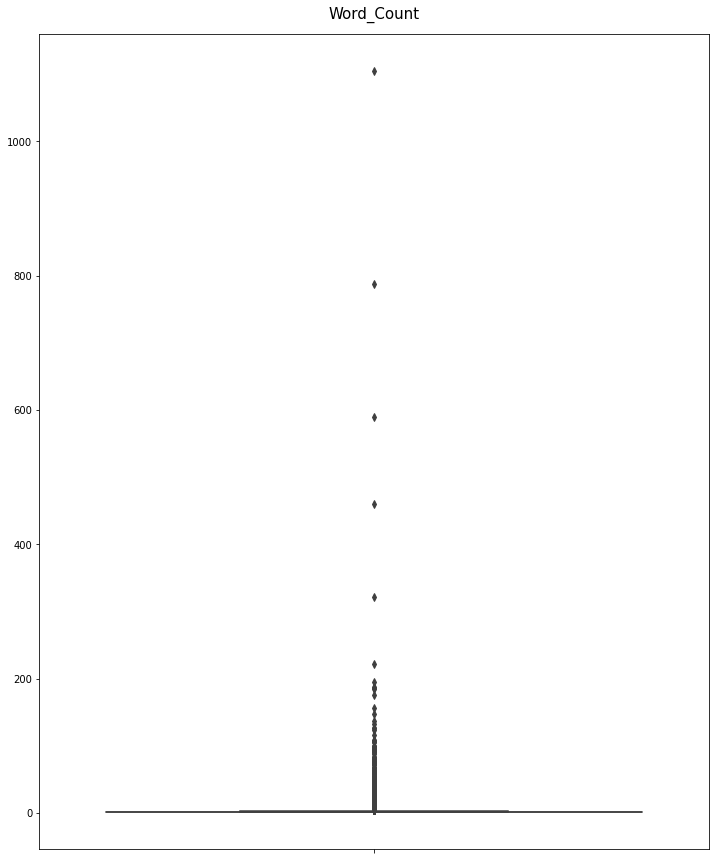

In [ ]:
counts=list(pruned_vocab.values())
fig,ax=plt.subplots(figsize=(12,15))
sns.boxplot(y=counts,ax=ax)
ax.set_title("Word_Count",fontdict=dict(size=15),pad=15)
plt.show()

**Text Cleaning**

In [ ]:
sample=data['Tweet'].iloc[102]
sample

'ูุฏู ูุง ูุฑุงู ูู ููู . #LEITOT . @oki_q8e ุดูู ุงุจู ุงุฎุชู ุดูู ๐ค https://t.co/ZmVMl4sOqA'

In [ ]:
def test_clean_fn(fn: Callable, sample: str) -> str:
    print(sample, fn(sample), sep="\n")

# **Stop Words**

In [ ]:
to_keep = ["ูุง"]
stop_words = [word for word in stopwords.words("arabic") if word not in to_keep] 

def remove_stop_words(text: str) -> str:
    return " ".join([word for word in text.split(" ") if word not in stop_words])


test_clean_fn(remove_stop_words, sample)


ูุฏู ูุง ูุฑุงู ูู ููู . #LEITOT . @oki_q8e ุดูู ุงุจู ุงุฎุชู ุดูู ๐ค https://t.co/ZmVMl4sOqA
ูุฏู ูุง ูุฑุงู ููู . #LEITOT . @oki_q8e ุดูู ุงุจู ุงุฎุชู ุดูู ๐ค https://t.co/ZmVMl4sOqA


#Removing Hashtag

In [ ]:
hashtag_re=re.compile(pattern='#[A-Za-z0-9_ุง_ู]+')
def remove_hashtag(text:str) -> str:
  return hashtag_re.sub(repl=" ",string=text)

test_clean_fn(remove_hashtag,sample)

ูุฏู ูุง ูุฑุงู ูู ููู . #LEITOT . @oki_q8e ุดูู ุงุจู ุงุฎุชู ุดูู ๐ค https://t.co/ZmVMl4sOqA
ูุฏู ูุง ูุฑุงู ูู ููู .   . @oki_q8e ุดูู ุงุจู ุงุฎุชู ุดูู ๐ค https://t.co/ZmVMl4sOqA


#Remove Mentions

In [ ]:
def remove_mentions(text:str) -> str:
  return re.sub(pattern=r"@[^\s]+" ,repl="", string=text)

text_clean_fn(remove_mentions,sample)

ูุฏู ูุง ูุฑุงู ูู ููู . #LEITOT . @oki_q8e ุดูู ุงุจู ุงุฎุชู ุดูู ๐ค https://t.co/ZmVMl4sOqA
ูุฏู ูุง ูุฑุงู ูู ููู . #LEITOT .  ุดูู ุงุจู ุงุฎุชู ุดูู ๐ค https://t.co/ZmVMl4sOqA
